#18266401 Lab 3
Made using Google Colab by Ayoub Jdair

Excersise Goal: of this exercise is to practice  techniques for discovering and visualising hidden patterns in data.

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

from google.colab import drive
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#Task 2

In [ ]:
# Loading dataset
drive.mount('/content/MyDrive')
df = pd.read_csv('Prepared_Bank.csv')
old_df = df

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
# Error - 'could not convert string to float:'
# Fix - Drop columns
# Getting column values
print(df.columns.values)

['Unnamed: 0' 'age' 'job' 'marital' 'default' 'balance' 'loan' 'day'
 'month' 'duration' 'campaign' 'pdays' 'previous' 'education_primary'
 'education_secondary' 'education_tertiary' 'education_nan' 'housing_no'
 'housing_yes' 'housing_nan' 'contact_cellular' 'contact_telephone'
 'contact_nan' 'subscribed_no' 'subscribed_yes' 'subscribed_nan' 'outcome']


In [ ]:
# for val in range(0, len(df.columns.values)-1):
#   df.drop([df.columns.values[val]], axis=1, inplace=True)

df.drop(['Unnamed: 0','job',
         'default', 'loan', 'day',
        'month', 'duration', 'campaign', 'pdays', 
         'previous', 
         'education_nan', 'housing_no', 'housing_yes', 
         'housing_nan', 'contact_cellular', 'contact_telephone',
        'contact_nan', 'subscribed_no', 'subscribed_yes', 
         'subscribed_nan', 'outcome'], axis=1, inplace=True)
print(df.columns.values)

['age' 'marital' 'balance' 'education_primary' 'education_secondary'
 'education_tertiary']


In [ ]:
# ERROR = Input contains NaN, infinity or a value too large for dtype('float64').
# Problem Child = 'balance'
# FIX = Drop NaN valules
df = df[df['age'].notna()]
df = df[df['marital'].notna()]
df = df[df['balance'].notna()]
df = df[df['education_primary'].notna()]
df = df[df['education_secondary'].notna()]
df = df[df['education_tertiary'].notna()]
df.head()

,age,marital,balance,education_primary,education_secondary,education_tertiary
0,32.0,1,5.978557,0,0,1
1,39.0,0,6.537952,0,1,0
2,59.0,2,6.944926,0,1,0
3,47.0,2,5.993637,0,1,0
4,54.0,2,6.914602,0,1,0


In [ ]:
data = np.array(df.values, dtype=float)
print('(Exmaples, Attributes) = ', data.shape)

(Exmaples, Attributes) =  (1909, 6)


In [ ]:
# Scale data with MinMax to interval 0-1
mms = preprocessing.MinMaxScaler()
data = mms.fit_transform(data)

In [ ]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [ ]:
k = 3

In [ ]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [ ]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [ ]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


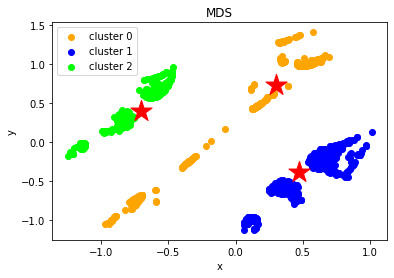

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [ ]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


transformation complete


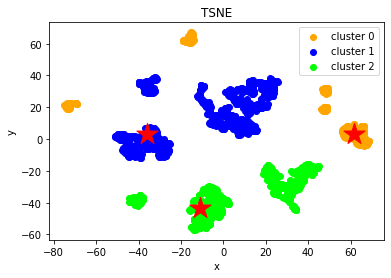

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [ ]:
# Adding cluster column
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [ ]:
df.head(10)

,age,marital,balance,education_primary,education_secondary,education_tertiary,cluster
0,32.0,1,5.978557,0,0,1,2
1,39.0,0,6.537952,0,1,0,1
2,59.0,2,6.944926,0,1,0,1
3,47.0,2,5.993637,0,1,0,1
4,54.0,2,6.914602,0,1,0,1
5,46.0,0,6.833969,0,0,1,2
6,34.0,2,7.563652,0,1,0,1
7,45.0,0,5.988636,0,1,0,1
8,58.0,0,5.761642,0,0,1,2
9,49.0,0,9.939331,0,0,1,2


In [ ]:
df.tail(10)

,age,marital,balance,education_primary,education_secondary,education_tertiary,cluster
1990,36.0,2,5.937193,0,0,1,2
1991,39.0,0,4.743801,0,1,0,1
1992,78.0,0,6.272632,1,0,0,0
1993,35.0,2,7.753138,0,0,0,0
1994,26.0,1,6.489007,0,1,0,1
1995,20.0,1,7.933033,0,0,0,0
1996,28.0,1,4.866534,0,1,0,1
1997,81.0,2,7.053473,1,0,0,0
1998,46.0,2,8.376981,1,0,0,0
1999,40.0,2,8.764970,0,1,0,1


In [ ]:
# Computing mean value of each attriute for each cluster
df.groupby('cluster').mean()

,age,marital,balance,education_primary,education_secondary,education_tertiary
cluster,,,,,,
0,49.098039,1.506536,6.252976,0.669935,0.0,0.0
1,41.326964,1.488323,6.107224,0.000000,1.0,0.0
2,39.108926,1.367625,6.339094,0.000000,0.0,1.0


#Task 2 Conclusion

Cluster 0 has the highest mean age & marital status, secondary and terieray education columns are 0 which suggests cluster 0 holds primary education attributes and but the second highest balance.

Cluster 1 shows a lower mean of age, marital but a higher education level (secondary), while also displaying the lowest balance

Cluster 2 has the youngest age groups, who are less likely to be married but the highest education & balance

**It turns out My data was comprimised form the last lab, i had large numbers in the columns and this was giving me many errors when trying to do this lab. In future i will be more catous of this portential issue.**

#Task 3

In [ ]:
df.head()

,age,marital,balance,education_primary,education_secondary,education_tertiary,cluster
0,32.0,1,5.978557,0,0,1,2
1,39.0,0,6.537952,0,1,0,1
2,59.0,2,6.944926,0,1,0,1
3,47.0,2,5.993637,0,1,0,1
4,54.0,2,6.914602,0,1,0,1


In [ ]:
# Sum of squared distances from each point
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]
cluster3 = df[df['cluster'] == 3]

centroid1 = cluster1.mean()
centroid2 = cluster2.mean()
centroid3 = cluster3.mean()

sum = centroid1.add(centroid2)

In [ ]:
data.shape

(1909, 6)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = min_max_scaler.fit_transform([np.float32(data)])
print(data_scaled)

In [ ]:
x_scaled

array([[0.18666667, 0.5       , 0.53458664, 0.        , 0.        ,
        1.        ],
       [0.28      , 0.        , 0.58346764, 0.        , 1.        ,
        0.        ],
       [0.54666667, 1.        , 0.61902982, 0.        , 1.        ,
        0.        ],
       ...,
       [0.84      , 1.        , 0.62851491, 1.        , 0.        ,
        0.        ],
       [0.37333333, 1.        , 0.74416555, 1.        , 0.        ,
        0.        ],
       [0.29333333, 1.        , 0.77806875, 0.        , 1.        ,
        0.        ]])

In [ ]:
def calc_intertia(data, top_k):
  ks = []
  for i in range(0, top_k):
    kmeans = cluster.KMeans(n_clusters=i).fit(data)
    centroids = kmeans.cluster_centers_
    prediction = kmeans.predict(data)
    temp = 0

    # Calculate inertia (sqaured distance from data points to thier cluster centers)
    for i in range(len(data)):
      center = centroids[prediction]
      # DISCLAIMER -> inspired by answers to this: 
      # https://stackoverflow.com/questions/51793928/distance-between-two-points-in-pandas-csv-data-frame
      temp += (data[i, 0] - data[0]) ** 2 + (data[i, 1] - data[1]) ** 2

    ks.append(temp)
  return ks

In [ ]:
# Fixing infinity error
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float(0)
    return int(round(x))

In [ ]:
for x in range(0, len(data)-1):
  data[x] = round_int(x)

data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00, 2.00000000e+00],
       ...,
       [1.90600000e+03, 1.90600000e+03, 1.90600000e+03, 1.90600000e+03,
        1.90600000e+03, 1.90600000e+03],
       [1.90700000e+03, 1.90700000e+03, 1.90700000e+03, 1.90700000e+03,
        1.90700000e+03, 1.90700000e+03],
       [2.93333333e-01, 1.00000000e+00, 7.78068746e-01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00]])

In [ ]:
x = [1, 2, 3, 4, 5]
y = calc_intertia(data, 5)
plt.plot(x,y)
plt.show()

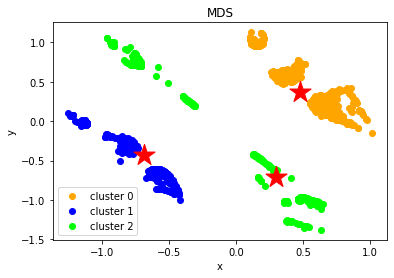

In [ ]:
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [ ]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

#Task 4

In [ ]:
silhouette = []
top_k = 5

for k in range(0, top_k):
  kmeans = cluster.KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  silhouette.append(silhouette_score(data, labels, metric = 'euclidean'))

In [ ]:
plt.plot(silhouette)

#Task 5

For this section i will use the Agglomerative clustering method, useful for Many clusters, possibly connectivity constraints, non Euclidean 
distances, transductive

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = data(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

In [ ]:
clustered_data_sklearn = cluster.DBSCAN().fit(data)

In [ ]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data)
print("transformation complete")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


transformation complete


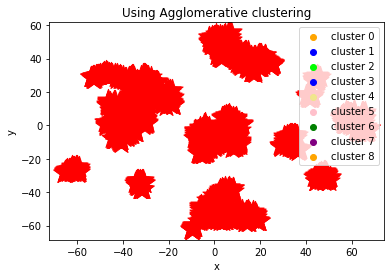

In [ ]:
clustering_scatterplot(points=XYcoordinates[:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[:], 
                       title='Using Agglomerative clustering')